In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# KNN Implementation from scratch - for binary classification

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def _euclidean_dist(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def fit(self, X, y): # Lazy Learner
        self.X_train = X
        self.y_train = y

    def _predict_one(self, x):
        distances = [self._euclidean_dist(x, x_train) for x_train in self.X_train] #x-new input feature,
                                                                                   #x_train-taining data                                                                        
        #distances becomes a list of numbers # Each number = distance from x to one training sample

        knn_indices = np.argsort(distances)[:self.k]  ##Returns the indices that would sort the array distances in ascending order.

        knn_classes = [self.y_train[i] for i in knn_indices] #list of classes 0 or 1

        majority_class = np.argmax(np.bincount(knn_classes)) #Finds the class label that appears most frequently among the K nearest neighbors.
        return majority_class  #eg:Majority vote = final prediction

    def predict(self, X):
        y_pred = [self._predict_one(x) for x in X]
        return np.array(y_pred)
        

In [4]:
 #Data
X_train = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [6, 5],
    [7, 7]
])

y_train = np.array([0, 0, 0, 1, 1])

X_test = np.array([
    [2, 2],
    [6, 6]
])

model = KNNClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

[0 1]


<Axes: xlabel='x1', ylabel='x2'>

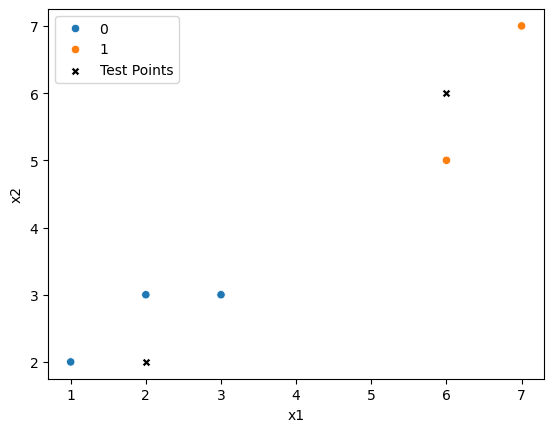

In [5]:
# Visualize
X_train_df = pd.DataFrame(X_train, columns=["x1", "x2"])
X_train_df["label"] = y_train

sns.scatterplot(
    data=X_train_df,
    x="x1",
    y="x2",
    hue="label"
)

X_test_df = pd.DataFrame(X_test, columns=["x1", "x2"])

sns.scatterplot(
    data=X_test_df,
    x="x1",
    y="x2",
    color="black",
    marker="X",
    label="Test Points"
)

In [6]:
distances=[5.5,2.5,4.5,1.5,0.5] #sorted array -[0.5,1.5,2.5,4.5,5.5]
np.argsort(distances)[:3]#Returns the indices that would sort the array distances in ascending order.

array([4, 3, 1, 2, 0])